# Análise de Dados de Acidentes Aereos (2008-2018)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import itertools as it
from itertools import product
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import folium
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/opendataaigbrazil/accidents.csv


## Funções

In [3]:
def tem_numero(string): # Retornar se string possue numero
  return any(char.isdigit() for char in string)

def remove_repetidos(array): # Remover Elementos Repetidos do Array
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

## Importar Dados

In [4]:
dados = pd.read_csv('/kaggle/input/opendataaigbrazil/accidents.csv')
dados.dataframeName = 'Accidents'
nRow, nCol, = dados.shape

dados

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,2008-11-26,16:40:00,NÃO IDENTIFICADA,SP,BRASIL,****,PRPSD,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5112,200811224318981,INCIDENTE,TRÁFEGO AÉREO,2008-11-22,11:55:00,NÃO IDENTIFICADA,SP,BRASIL,****,PTMVE,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5113,200810318709738,INCIDENTE,POUSO SEM TREM,2008-10-31,18:00:00,NÃO IDENTIFICADA,GO,BRASIL,****,PTLHE,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
5114,201309012098180,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,2013-09-02,02:54:00,ÁGUAS INTERNACIONAIS,***,BRASIL,****,PTMVL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06


## Removendo Dados Nao Manipulados (Fator_*)

In [5]:
remover_fator = []
for i in range(1, len(dados.columns)):
  if tem_numero(dados.columns[i]) == True:
    remover_fator.append(dados.columns[i])

dados.drop(columns=remover_fator, inplace=True)
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,...,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,...,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06


## Dados Distintos do DataFrame

In [6]:
dados_distintos = pd.DataFrame(dados.nunique())
dados_distintos

,0
codigo_ocorrencia,5063
ocorrencia_classificacao,3
ocorrencia_tipo,60
ocorrencia_dia,2680
ocorrencia_horario,915
ocorrencia_cidade,994
ocorrencia_uf,28
ocorrencia_pais,1
ocorrencia_aerodromo,461
aeronave_matricula,3770


## Quantidade de Acidentes por Estados

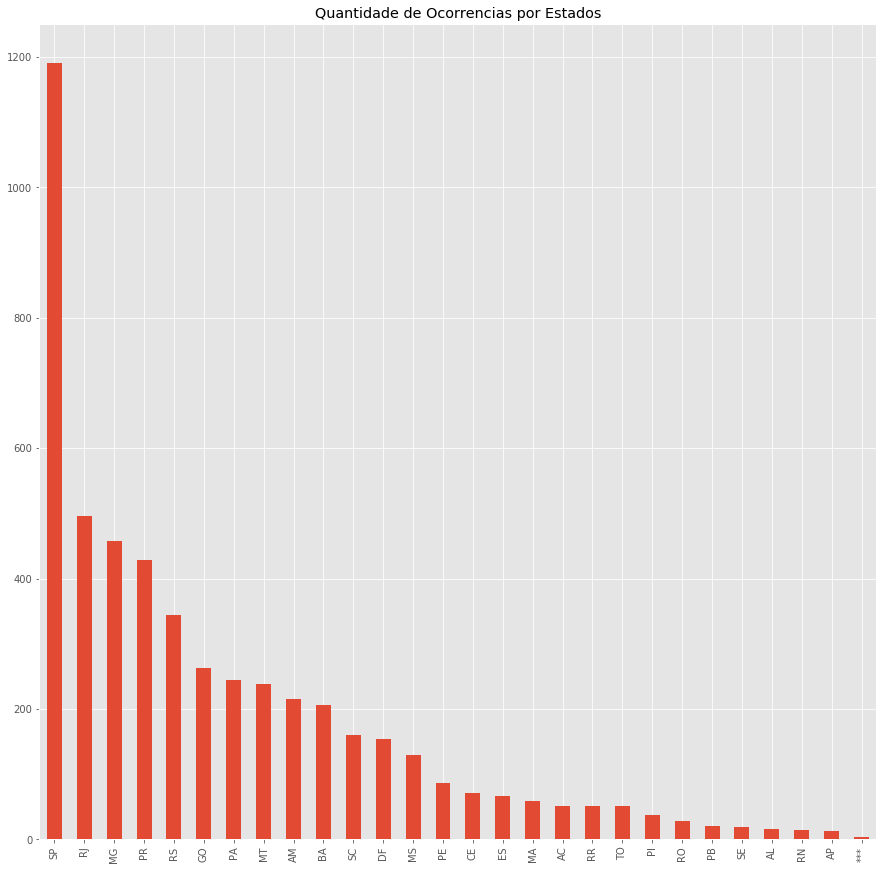

In [12]:
plt.style.use("ggplot")
acidentes_uf = dados['ocorrencia_uf'].value_counts().plot(kind='bar',
                                                         subplots=True,
                                                         label='Quantidade de Ocorrencias por Estados',
                                                         figsize=(15,15))